# **Управление обращенным маятником на тележке при помощи SDRE**

---



# Герман Гавриленко (Б03-903)



# Постановка задачи

Рассмотреть обращенный маятник на тележке и применить к нему метод SDRE для управления им. Наша задача стабилизировать его неустойчивое верхнее равновесие.

Рассматриваемая статья(пример 5.1):
https://doi.org/10.1016/j.arcontrol.2010.03.001

# Модель


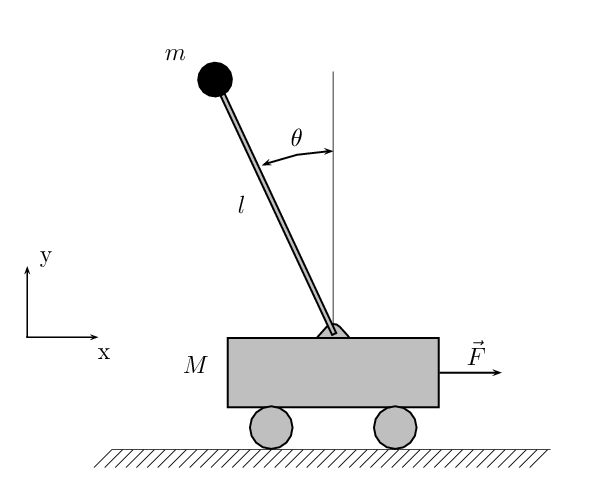

Математическая модель:

\begin{cases}
\ddot{x} = \frac{1}{d}[ml\dot{\theta}^2sin\theta-mgsin\theta cos\theta+u] \\
\ddot{\theta} = \frac{1}{dl}[(M+m)gsin\theta-ml\dot{\theta}^2sin\theta cos\theta-ucos\theta] 
\end{cases}

\begin{equation}
d \triangleq M+msin^2\theta
\end{equation}

* $M$ : масса тележки [$кг$]
* $x$ : смещение тележки [$м$]
* $m$ : масса маятника [$кг$]
* $l$ : длина маятника [$м$]
* $\theta$ : угол, который образует маятник с вертикалью [$рад$]
* $g$ : ускорение свободного падения [$\frac{м}{с^2}$]
* $u$ : сила, приложенная к тележке, действующая как управляющий вход [$Н$]






# State-Dependent Riccati Equation(SDRE)

Рассматривается система управления, модель которой представляется в виде
$$\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}) + \mathbf{B}(\mathbf{x}) \cdot \mathbf{u}, \quad \mathbf{x} \in \mathbb{R}^n, \quad u \in \mathbb{R}^m$$

$\mathbf{x} = 0$ - равновесие, то есть $\mathbf{f}(0) = 0$.


Цель: найти управление $\mathbf{u}(t)$, минимизирующее функционал  

$$ J = \frac{1}{2}\int_{0}^{\infty} \mathbf{x}^T(t) \mathbf{Q}(x) \mathbf{x}(t) + \mathbf{u}(t)^T \mathbf{R}(x) \mathbf{u}(t) dt $$  
где 
$\mathbf{Q} \geq 0, \mathbf{R}>0$ .

Закон управления ищется в виде
$$\mathbf{u}(t) = \mathbf{k}(\mathbf{x}) = -\mathbf{K(\mathbf{x})}\mathbf{x}, \quad \mathbf{k}(0)=0.$$

Можно показать, что при условии $\mathbf{f}(0) = 0$ и $\mathbf(f) \in C^1(\mathbb{R}^n)$ всегда найдётся такая $\mathbf{A}(\mathbf{x})$, что

$$\mathbf{f}(\mathbf{x}) = \mathbf{A}(\mathbf{x})\cdot \mathbf{x}$$

Таким образом, исходная система может быть записана в виде:

$$\dot{\mathbf{x}} = \mathbf{A}(\mathbf{x})\cdot \mathbf{x} + \mathbf{B}(\mathbf{x}) \cdot \mathbf{u},$$
эти уравнения имеют линейную структуру, но матрицы $\mathbf{A}$ и $\mathbf{B}$ зависят от вектора состояния $\mathbf{x}$.

Применение к такой системе методов управления линейными системами приводит к нахождению законов управления вида $\mathbf{u}(t) = -\mathbf{K(\mathbf{x})}\mathbf{x}$, что даёт матрицу системы с отрицательной обратной связью вида
$$\mathbf{A}_{CL}(\mathbf{x}) = \mathbf{A}(\mathbf{x}) - \mathbf{B}(\mathbf{x})\mathbf{K}(\mathbf{x}),$$
которая должна быть гурвицевой в каждой точке.

#### SDRE

применяя к системе алгоритм для задачи о линейно-квадратичном регуляторе, получим:

$$\mathbf{u}(t) = \mathbf{R}^{-1}(\mathbf{x})\mathbf{B}^{T}(\mathbf{x})\mathbf{P}(\mathbf{x})\cdot \mathbf{x},$$

где $\mathbf{P}(\mathbf{x})$ - определённое единственным образом, симметрическое решение уравнения Риккати с коэффициентами, зависящими от вектора состояния:

$$\mathbf{P}(\mathbf{x})\mathbf{A}(\mathbf{x}) + \mathbf{A}^T(\mathbf{x})\mathbf{P}(\mathbf{x})-\mathbf{P}(\mathbf{x})\mathbf{B}(\mathbf{x})\mathbf{R}^{-1}(\mathbf{x})\mathbf{B}^T(\mathbf{x})\mathbf{P}(\mathbf{x})+\mathbf{Q}(\mathbf{x})=0$$

# Интегрирование модели и визуализация

Вектор состояния
\begin{equation}
\mathbf{x} \triangleq [x,\theta,\dot{x},\dot{\theta}]^T
\end{equation}
Матрицы системы для нахождения управления(метод их получения приведен в статье)
$$\mathbf{A}(\mathbf{x},\mathbf{\alpha}) = \frac{1}{dl}
\begin{pmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
0 & lmsinc\theta(l\alpha_1\dot{\theta}^2 - gcos\theta) & 0 & ml^2(1-\alpha_1)\dot{\theta}sin\theta \\
0 & sinc\theta[(M+m)g - ml\alpha_2\dot{\theta}^2cos\theta] & 0 & -lm(1-\alpha_2)\dot{\theta}sin\theta cos\theta 
\end{pmatrix}, \quad 
\mathbf{B}(\mathbf{x}) = \frac{1}{dl}
\begin{pmatrix}
0 \\ 0 \\ l \\ -cos\theta  
\end{pmatrix},
\quad 
\mathbf{R}(\mathbf{x}) = 1 + ||\mathbf{x}||,
$$

\begin{equation}
sinc\theta = \frac{sin\theta}{\theta}.
\end{equation}

В статье проводится сравнение двух матриц $Q$

$$
\mathbf{Q}= \mathbf{Q_0} + \mathbf{Q_i}, \forall{i} =1,2
\quad 
\mathbf{Q_0}(\mathbf{x}) = 
\begin{pmatrix}
10 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 \\
0 & 0 & 0.1 & 0 \\
0 & 0 & 0 & 0.1
\end{pmatrix},
\quad 
\mathbf{Q_1}(\mathbf{x}) = \mathbf{0_{4\times4}},
\quad 
\mathbf{Q_2}(\mathbf{x}) = 
\begin{pmatrix}
1000x^2 & 0 & 0 & 0 \\
0 & 2\theta^2 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix}.
$$


Параметры рассматриваемой системы

*   $M = 0.5$ $кг$
*   $m = 0.25$ $кг$
*   $l = 0.15$ $м$
*   $g = 9.81$ $\frac{м}{с^2}$
* $u \in [-15,15]$ $[Н]$

Начальные условия

*   $x = 0$ $м$
*   $\theta = 3$ $рад$
*   $\dot{x} = 0$ $\frac{м}{с}$
*   $\dot{\theta} = 0$ $\frac{рад}{с}$







In [1]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 

In [2]:
# параметры системы 
M = 0.5
m = 0.25
l = 0.15
g = 9.81
u_max = 15

# начальные условия x, theta, v, omega
x0 = np.array([0, 3, 0 ,0])

\begin{equation}
\mathbf{Q}(\mathbf{x}) = 
\begin{pmatrix}
10 & 0 & 0 & 0 \\
0 & 2 & 0 & 0 \\
0 & 0 & 0.1 & 0 \\
0 & 0 & 0 & 0.1
\end{pmatrix} \tag{1}
\end{equation}

In [3]:
# решение алгебраического уравнения Риккати
def lqr_fun(A, B, Q, R):
    P = np.matrix(sci.linalg.solve_continuous_are(A, B, Q, R))
 
    K = -np.matrix(sci.linalg.inv(R) * (B.T * P))
 
    eigVals, eigVecs = sci.linalg.eig(A + B * K)
 
    return K, P, eigVals

def u_sdre1(x):
    alpha1 = 1
    alpha2 = 0

    d = M + m * np.sin(x[1]) * np.sin(x[1])

    a32 = m * (np.sin(x[1]) / x[1]) * (l * alpha1 * x[3] * x[3] - g * np.cos(x[1])) / d
    a34 = m * l * (1 - alpha1) * x[3] * np.sin(x[1]) / d
    a42 = (np.sin(x[1]) / x[1]) * ((M + m) * g - m * l * alpha2 * x[3]*x[3] * np.cos(x[1])) / (d * l)   
    a44 = (-1) * m * (1 - alpha2) * x[3] * np.sin(x[1]) * np.cos(x[1]) / d 

    b1 = 1 / d
    b2 = -np.cos(x[1]) / (d * l)

    A = np.array([[0., 0., 1., 0.], 
                  [0., 0., 0., 1.], 
                  [0., a32, 0., a34], 
                  [0., a42, 0., a44]])

    B = np.array([[0.], [0.], [b1], [b2]])
    
    Q = np.array([[10., 0., 0., 0.],
                  [0., 2., 0., 0.],
                  [0., 0., 0.1, 0.],
                  [0., 0., 0., 0.1]])
    
    R = np.eye(1) * (1 + np.linalg.norm(x))

    K, _, _ = lqr_fun(A, B, Q, R)

    u = np.dot(K, x).item()

    if (abs(u) > u_max):
        u = u_max * np.sign(u)
    
    return u

def rhs1(t, x):
  
  dxdt = np.zeros(4)

  u = u_sdre1(x)

  d = M + m * np.sin(x[1]) * np.sin(x[1])

  dxdt[0] = x[2]
  
  dxdt[1] = x[3]

  dxdt[2] = (m * l * x[3] * x[3] * np.sin(x[1]) - m * g * np.sin(x[1]) * np.cos(x[1]) + u) / d
  
  dxdt[3] = ((M + m) * g * np.sin(x[1]) - m * l * x[3] * x[3] * np.sin(x[1]) * np.cos(x[1]) - u * np.cos(x[1])) / (d * l)
  
  return dxdt


t0 = 0.
tf = 10.
t_eval = np.arange(t0, tf, 0.01)


sol = solve_ivp(rhs1, (t0, tf), x0,t_eval = t_eval)
x1 = sol.y.T
t1 = sol.t

u1 = np.empty(len(x1[:, 0]))
for i in range(len(x1[:, 0])):
   u1[i] = u_sdre1(x1[i, :])

\begin{equation}
\mathbf{Q}(\mathbf{x}) = 
\begin{pmatrix}
10+1000x^2 & 0 & 0 & 0 \\
0 & 2 + 2\theta^2 & 0 & 0 \\
0 & 0 & 0.1 & 0 \\
0 & 0 & 0 & 0.1
\end{pmatrix} \tag{2}
\end{equation}

In [4]:
x0 = np.array([0., 3., 0., 0.])

def u_sdre2(x):
    alpha1 = 1
    alpha2 = 0

    d = M + m * np.sin(x[1]) * np.sin(x[1])
    
    a32 = m * (np.sin(x[1]) / x[1]) * (l * x[3] * x[3] * alpha1 - g * np.cos(x[1])) / d
    a34 = m * l * (1 - alpha1) * x[3] * np.sin(x[1]) / d
    a42 = (np.sin(x[1]) / x[1]) * ((M + m) * g - m * l * alpha2 * (x[3]**2) * np.cos(x[1])) / (d * l)   
    a44 = (-1) * m * (1 - alpha2) * x[3] * np.sin(x[1]) * np.cos(x[1]) / d
    
    b1 = 1 / d
    b2 = (-1) * np.cos(x[1]) / (d * l)
    
    A = np.array([[0., 0., 1., 0.], 
                  [0., 0., 0., 1.], 
                  [0., a32, 0., a34], 
                  [0., a42, 0., a44]])
    
    B = np.array([[0], [0], [b1], [b2]])
    
    Q = np.array([[10. + 1000 * (x[0]**2), 0., 0., 0.], 
                  [0., 2. + 2. * (x[1]**2), 0., 0.], 
                  [0., 0., 0.1, 0.], 
                  [0.,0.,0.,0.1]])
    
    R = np.eye(1) * (1 + np.linalg.norm(x))
    
    K, _, _ = lqr_fun(A, B, Q, R)
    
    u = np.dot(K, x).item()
    
    if (abs(u) > u_max):
        u = u_max * np.sign(u)
    
    return u

def rhs2(t,x):

    dxdt = np.empty(4)
    
    d = M + m * np.sin(x[1]) * np.sin(x[1])

    u = u_sdre2(x)
    
    dxdt[0] = x[2]
    
    dxdt[1] = x[3]
    
    dxdt[2] = (m * l * x[3] * x[3] * np.sin(x[1]) - m * g * np.sin(x[1]) * np.cos(x[1]) + u) / d
    
    dxdt[3] = ((M + m) * g * np.sin(x[1]) - m * l * x[3] * x[3] * np.sin(x[1]) * np.cos(x[1]) - u * np.cos(x[1])) / (d * l)
    
    return dxdt

t0 = 0.
tf = 10.
t_eval = np.arange(t0, tf, 0.01)

sol = solve_ivp(rhs2, (t0, tf), x0,t_eval = t_eval)
x2 = sol.y.T
t2 = sol.t

u2 = np.empty(len(x2[:, 0]))
for i in range(len(x2[:, 0])):
   u2[i] = u_sdre2(x2[i, :])

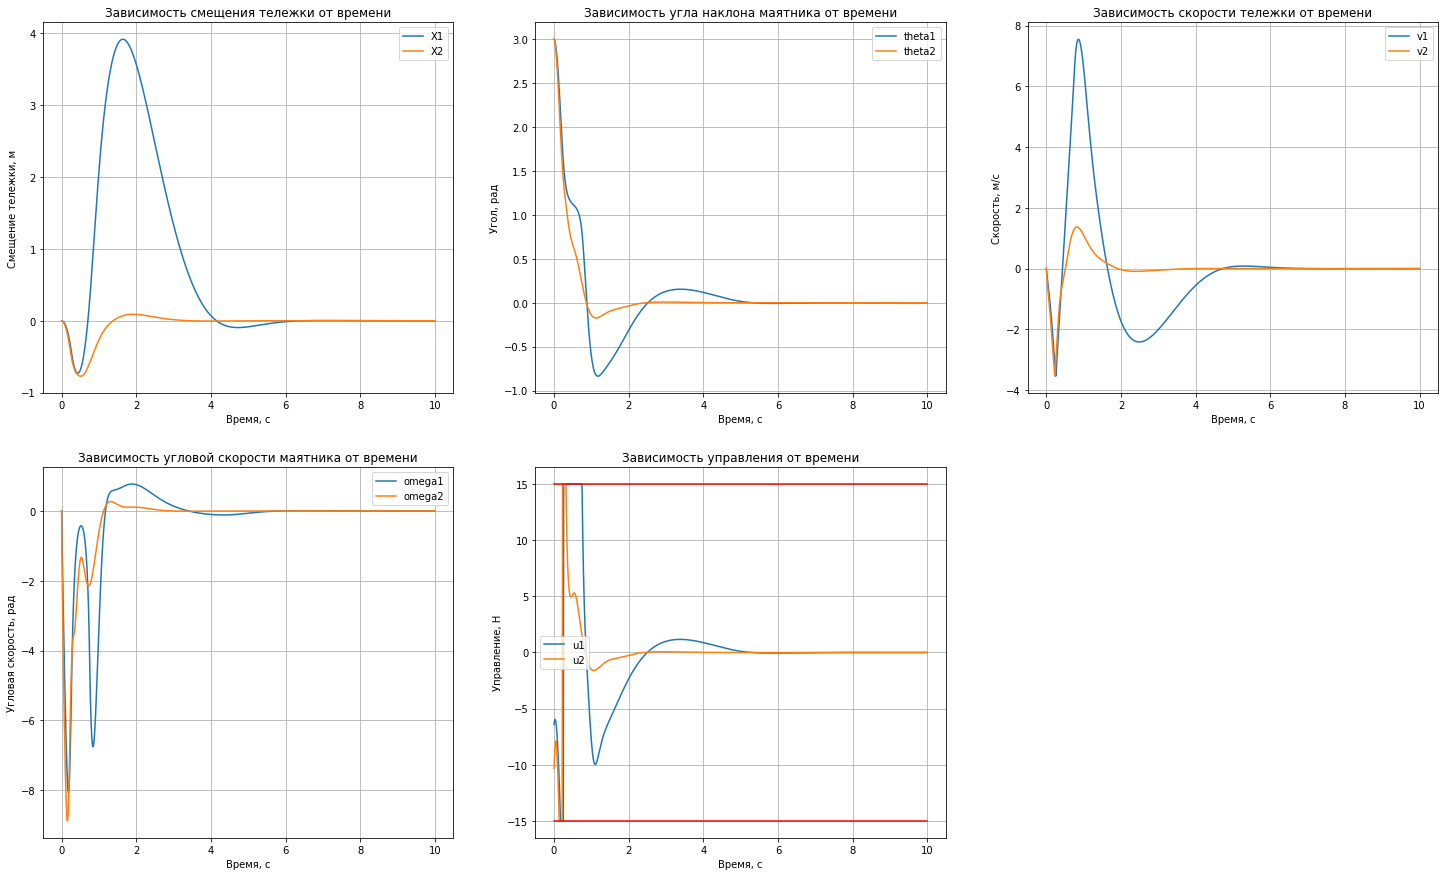

In [5]:
fig = plt.figure(figsize=(25,15))

ax1 = fig.add_subplot(2,3,1)
ax1.plot(t1, x1[:,0], t2, x2[:, 0])
ax1.set_xlabel('Время, с')
ax1.set_ylabel('Смещение тележки, м')
ax1.legend(['X1','X2'])
ax1.set_title('Зависимость смещения тележки от времени')
ax1.grid()

ax2 = fig.add_subplot(2,3,2)
ax2.plot(t1, x1[:,1], t2, x2[:, 1])
ax2.set_xlabel('Время, с')
ax2.set_ylabel('Угол, рад')
ax2.legend(['theta1','theta2'])
ax2.set_title('Зависимость угла наклона маятника от времени')
ax2.grid()

ax3 = fig.add_subplot(2,3,3)
ax3.plot(t1, x1[:,2], t2, x2[:, 2])
ax3.set_xlabel('Время, с')
ax3.set_ylabel('Скорость, м/с')
ax3.legend(['v1','v2'])
ax3.set_title('Зависимость скорости тележки от времени')
ax3.grid()

ax4 = fig.add_subplot(2,3,4)
ax4.plot(t1, x1[:,3], t2, x2[:, 3])
ax4.set_xlabel('Время, с')
ax4.set_ylabel('Угловая скорость, рад')
ax4.legend(['omega1','omega2'])
ax4.set_title('Зависимость угловой скорости маятника от времени')
ax4.grid()

lim1 = np.full((1000, 1),u_max)
lim2 = np.full((1000, 1),-u_max)

ax5 = fig.add_subplot(2,3,5)
ax5.plot(t1, u1, t2, u2, t1, lim1, 'r', t2, lim2, 'r')
ax5.set_xlabel('Время, с')
ax5.set_ylabel('Управление, Н')
ax5.legend(['u1', 'u2'])
ax5.set_title('Зависимость управления от времени')
ax5.grid()

# Вывод

На графиках приведено сравнение двух законов управления. Показано, что управление с матрицей $(2)$ быстрее стабилизирует маятник, с меньшим смещением тележки от начального положения, а также с меньшим изменением угла наклона. Можно сказать, что данное управление более плавное по сравнению с $(1)$.